### Linear regression with GD
- 임의의 세타0,세타1 값으로 초기화
- Cost function J(세타0,세타1)이 최소화 될 때까지 학습
- 더 이상 cost function이 줄어들지 않거나 학습횟수를 초과할 때 종료

- Learning rate, Iteration 횟수 등 Parameter 지정
- Feature가 많으면 Normal equation에 비해 상대적으로 빠름
- 최적값에 수렴하지 않을 수도 있음

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import random

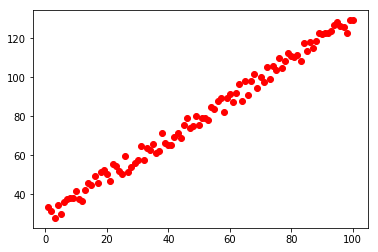

In [13]:
# data generation하기
def gen_data(numPoints, bias, variance):
# bias : w0 값, variance : 임의로 랜덤하게 생성
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        #our target variable
        y[i] = (i+bias) + random.uniform(0,1) * variance
    return x,y

# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = gen_data(100,25,10)

plt.plot(x[:,1]+1,y,"ro")
plt.show()

In [41]:
def hypothesis_function(X, theta):
    return X.dot(theta)

In [42]:
h = hypothesis_function(X,w)

In [43]:
def cost_function(h, y):
    return (1/(2*len(y))) * np.sum((h-y)**2)

In [48]:
h = hypothesis_function(X,w)
cost_function(h, y)

5341.920269461877

In [47]:
def gradient_descent(X,y,w,alpha,iterations):
# X : 1과 여러가지 숫자, y : 예측하려는 값 (100개가 들어가있겠지)
# w : x0,x1 두 개가 있으니 w도 2개 (w0,w1)
# alpha : learning rate, interations : 얼마나 돌건지
    theta = w
    m = len(y) # data의 갯수
    
    theta_list = [theta.tolist()]
    cost = cost_function(hypothesis_function(X,theta),y)
    cost_list = [cost]
    # 밑 코드의 for i in range(0, numIterations)의 코드
    
    # J의 함수 w0, w1로 미분한 값들 그대로 써줌(좋은 코드는 X)
    for i in range(iterations):
        t0 = theta[0] - (alpha/m) * np.sum(np.dot(X,theta)-y)
        t1 = theta[1] - (alpha/m) * np.sum((np.dot(X,theta)-y)*X[:,1])
        theta = np.array([t0,t1])
        
        # cost가 어떻게 변하는지 보기 위해 사용하는 코드
        if i % 10 == 0:
            theta_list.append(theta.tolist())
            cost = cost_function(hypothesis_function(X,theta),y)
            cost_list.append(cost)
            
    return theta, theta_list, cost_list

In [46]:
iterations = 10000
alpha = 0.001

theta, theta_list, cost_list = gradient_descent(X, y, w, alpha, iterations)
cost = cost_function(hypothesis_function(X, theta), y)

print("theta:", theta)
print('cost:', cost_function(hypothesis_function(X, theta), y))

theta: [19.86693109  3.41657777]
cost: 625.3750783452449


## 수업

In [ ]:
plt.figure(figsize=(10,5))

y_predict_step = np.dot(X,theta_list.transpose())
plt.plot(raw_X,y,"o",alpha=0.5)
for i in range(0,len(cost_list),100):
    plt.plot(raw_X,y_predict_step[:,i],label='Line %d'%i)
    
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()

In [ ]:
y_predict_step = np.dot(x,theta_list.transpose())
plt.plot(x[:.1],y,"ro")
for i in range(0,20,2):
    plt.plot(x[:,1],y_predict_step[:,i],label='Line %d'%i)
    
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()

In [ ]:
y_predict = np.dot(x,yheta)
plt.plot(x[:,1],y,"ro")
plt.plot(x[:,1],y_predict,lw=3)
plt.show()

In [ ]:
cost_list
iterations = range(len(cost_list))

plt.scatter(iterations,cost_list)
plt.show()

In [ ]:
# m denotes the number of examples here, not the number of features
def gradient_descent(x,y,theta,alpha,m,numIterations):
    xTrans = x.transpose()
    theta_list = []
    cost_list = []
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        
        cost = np.sum(loss ** 2) / (2 * m)
        gradient = np.dot(xTrans, loss) / m
        print(gradient.shape)
        
        # update
        theta = theta - alpha * gradient
        if i % 250 == 0:
            theta_list.append(theta)
            cost_list.append(cost)
    return theta, np.array(theta_list), cost_list

m,n = np.shape(x)
numIterations = 5000
alpha = 0.0005
theta = np.ones(n)

In [33]:
df = pd.read_csv("slr06.csv")
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [34]:
raw_X = df["X"].values.reshape(-1, 1)
y = df["Y"].values

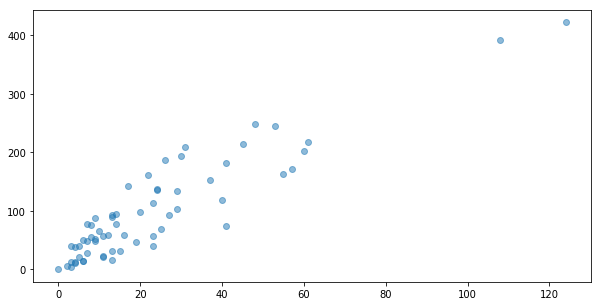

In [35]:
plt.figure(figsize=(10,5))
plt.plot(raw_X,y, 'o', alpha=0.5)

In [36]:
raw_X[:5], y[:5]

(array([[108],
        [ 19],
        [ 13],
        [124],
        [ 40]], dtype=int64), array([392.5,  46.2,  15.7, 422.2, 119.4]))

In [37]:
np.ones((len(raw_X),1))[:3]

array([[1.],
       [1.],
       [1.]])

In [38]:
X = np.concatenate( (np.ones((len(raw_X),1)), raw_X ), axis=1)
X[:5]

array([[  1., 108.],
       [  1.,  19.],
       [  1.,  13.],
       [  1., 124.],
       [  1.,  40.]])

In [39]:
w = np.random.normal((2,1)) 
# w = np.array([5,3])
w

array([-0.08224806,  0.89816962])

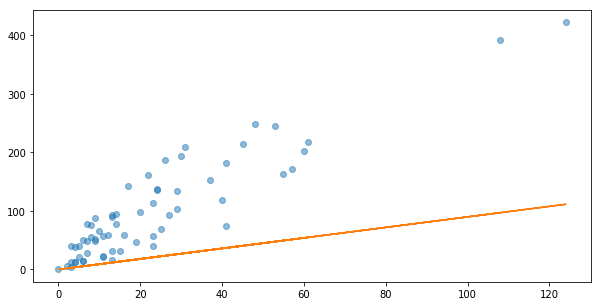

In [40]:
plt.figure(figsize=(10,5))
y_predict = np.dot(X, w)
plt.plot(raw_X,y,"o", alpha=0.5)
plt.plot(raw_X,y_predict)